In [1]:
import pandas as pd
data = pd.read_csv('/content/drive/MyDrive/paper_5/cm_hinglish_f.csv')

In [2]:
data_text = data['text']
data_label = data['label']

In [3]:
 import numpy as np
 from sklearn.model_selection import train_test_split
 train, test, labels_train, labels_test = train_test_split(data_text, data_label, test_size=0.20, random_state=42 )

In [4]:
import numpy as np
from keras.utils.np_utils import to_categorical
#classes_list = ["ham","spam"]
#label_index = class_label.apply(classes_list.index)
label_train = to_categorical(np.asarray(labels_train))
label_test = to_categorical(np.asarray(labels_test))

In [5]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vector = TfidfVectorizer(ngram_range=(1,3), max_features = 10000)
X_train_tfidf = tfidf_vector.fit_transform(train)
X_test_tfidf = tfidf_vector.transform(test)

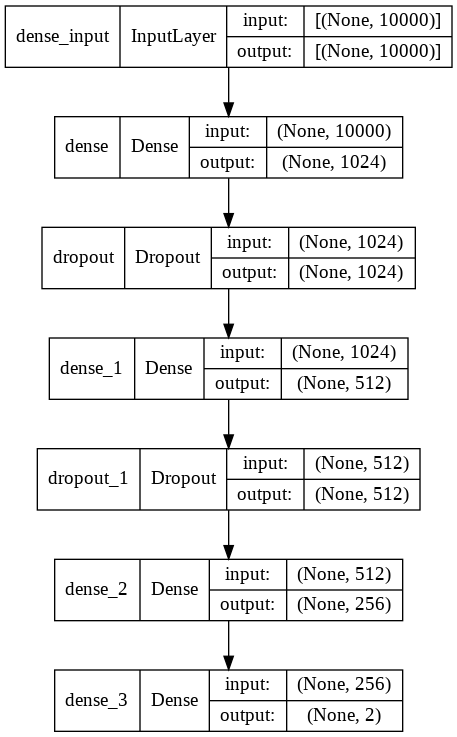

In [6]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.utils.vis_utils import plot_model
# define the keras model
model = Sequential()
model.add(Dense(1024, input_dim=X_train_tfidf.shape[1], activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(256, activation='relu'))
model.add(Dense(2, activation='softmax'))
# compile the keras model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
plot_model(model, to_file='model_plot_dense.png', show_shapes=True, show_layer_names=True)

In [7]:
# fit the keras model on the dataset
model.fit(X_train_tfidf.toarray(), label_train, validation_data=(X_test_tfidf.toarray(), label_test), epochs=10, batch_size=10, verbose =2)

Epoch 1/10
420/420 - 33s - loss: 0.1934 - accuracy: 0.9157 - val_loss: 0.1620 - val_accuracy: 0.9248 - 33s/epoch - 79ms/step
Epoch 2/10
420/420 - 22s - loss: 0.0866 - accuracy: 0.9614 - val_loss: 0.1672 - val_accuracy: 0.9295 - 22s/epoch - 52ms/step
Epoch 3/10
420/420 - 22s - loss: 0.0271 - accuracy: 0.9881 - val_loss: 0.2631 - val_accuracy: 0.9286 - 22s/epoch - 53ms/step
Epoch 4/10
420/420 - 22s - loss: 0.0054 - accuracy: 0.9981 - val_loss: 0.4329 - val_accuracy: 0.9286 - 22s/epoch - 51ms/step
Epoch 5/10
420/420 - 22s - loss: 0.0024 - accuracy: 0.9993 - val_loss: 0.4575 - val_accuracy: 0.9229 - 22s/epoch - 52ms/step
Epoch 6/10
420/420 - 22s - loss: 0.0012 - accuracy: 0.9998 - val_loss: 0.5040 - val_accuracy: 0.9248 - 22s/epoch - 51ms/step
Epoch 7/10
420/420 - 22s - loss: 0.0011 - accuracy: 0.9998 - val_loss: 0.4873 - val_accuracy: 0.9248 - 22s/epoch - 51ms/step
Epoch 8/10
420/420 - 22s - loss: 0.0012 - accuracy: 0.9998 - val_loss: 0.6688 - val_accuracy: 0.9105 - 22s/epoch - 53ms/step


In [9]:
predictions_test = model.predict(X_test_tfidf.toarray())
predictions_test1 = np.zeros_like(predictions_test)
predictions_test1[np.arange(len(predictions_test)), predictions_test.argmax(1)] = 1
from sklearn.metrics import classification_report
print('DNN')
print(classification_report(label_test,predictions_test1))

DNN
              precision    recall  f1-score   support

           0       0.93      0.98      0.95       928
           1       0.71      0.41      0.52       122

   micro avg       0.91      0.91      0.91      1050
   macro avg       0.82      0.69      0.74      1050
weighted avg       0.90      0.91      0.90      1050
 samples avg       0.91      0.91      0.91      1050

